**We recommend to view the file at**

# Creation of predictive models

# [1- Load basic modules](#1)

# [2- Load CSV And Pre-Processing](#2)

- ## [2.1- Load CSV](#2.1)
- ## [2.2- Collinearity](#2.2)
- ## [2.3- Dummy variables, train/test and standardization](#2.3)

# [3- Logistic Regression](#3)


# [4- Naive Bayes](#4)


# [5- KNN](#5)
- ## [5.1- K between 1 and 25](#5.1)
- ## [5.2- GridSearchCV](#5.2)

# [6- Random Forest](#6)
- ## [6.1- Generating validation curves](#6.1)
    - ### [A- n_estimators](#6.1.A)
    - ### [B- max_depth](#6.1.B)
    - ### [C- min_samples_split](#6.1.C)
    - ### [D- min_samples_leaf](#6.1.D)
    - ### [E- All combined](#6.1.E)
- ## [6.2- RandomSearch](#6.2)

# [6- Conclusion](#7)

<a id='1'></a>

---

# 1. Load basic modules 

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, roc_auc_score, precision_score, f1_score, recall_score

<a id='2'></a>

---

# 2. Load CSV And Pre-Processing

<a id='2.1'></a>

## 2.1 Load CSV

In [2]:
data = pd.read_csv("../../fr_cv/documents/data_both_scores.csv")
data.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,bmi,fram,esc
0,f,110.0,80.0,normal,normal,no,no,yes,0,50,21.97,15,2
1,m,140.0,90.0,high,normal,no,no,yes,1,55,34.93,15,10
2,m,130.0,70.0,high,normal,no,no,no,1,51,23.51,12,6
3,f,150.0,100.0,normal,normal,no,no,yes,1,48,28.71,17,2
4,m,100.0,60.0,normal,normal,no,no,no,0,47,23.01,17,2


<a id='2.2'></a>

## 2.2 Collinearity

In [3]:
model = sm.GLM.from_formula("cardio ~ gender + AgeinYr + cholesterol + gluc + smoke + alco + active + bmi + fram + esc", family = sm.families.Binomial(), data=data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                67359
Model:                            GLM   Df Residuals:                    67346
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39953.
Date:                Wed, 27 Jul 2022   Deviance:                       79906.
Time:                        22:17:55   Pearson chi2:                 7.27e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1813
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.5938      0.122     -4.876      0.000      -0.832      -0.355
gender[T.m]              -0.9415      0.028    -33.049      0.000      -0.997      -0.886
cholesterol[T.high]       0.1972      0.043      4.621      0.000       0.114       0.281
cholesterol[T.normal]    -0.3759      0.030    -12.660      0.000      -0.434      -0.318
gluc[T.normal]            0.4060      0.039     10.306      0.000       0.329       0.483
gluc[T.prediabetes]       0.4309      0.051      8.517      0.000       0.332       0.530
smoke[T.yes]             -1.8966      0.043    -44.211      0.000      -1.981      -1.813
alco[T.yes]              -0.1553      0.040     -3.836      0.000      -0.235      -0.076
active[T.yes]            -0.1763      0.021     -8.237      0.000      -0.218      -0.134
AgeinYr                  -0.0651      0.002    -28.893      0.000      -0.069      -0.061
bmi                       0.0446      0.002     24.501      0.000       0.041       0.048
fram                      0.0997      0.004     27.323      0.000       0.093       0.107
esc                       0.4433      0.008     56.920      0.000       0.428       0.459
=========================================================================================
"""

**The p-values for most of the variables are smaller than 0.05, so we keep all the features**

In [4]:
corr = data[["AgeinYr", "bmi", "fram", "esc"]].corr() # Esto por qué y para qué? Por qué no se tomaron las variables de la presión arterial?
corr

,AgeinYr,bmi,fram,esc
AgeinYr,1.000000,0.096048,0.398127,0.681668
bmi,0.096048,1.000000,0.066508,0.233437
fram,0.398127,0.066508,1.000000,0.244956
esc,0.681668,0.233437,0.244956,1.000000


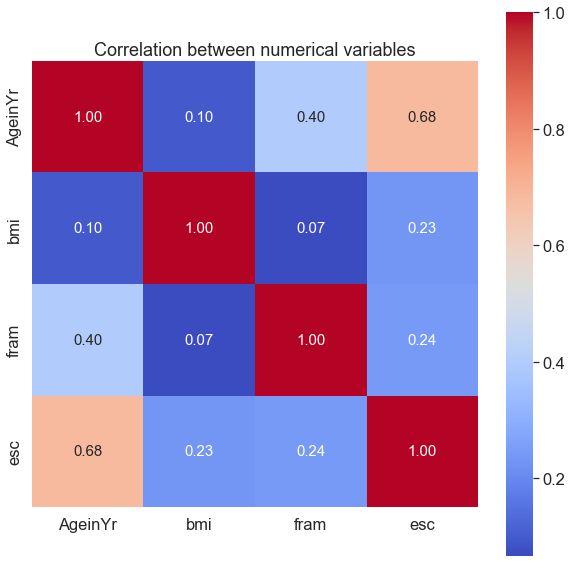

In [5]:
plt.style.use("seaborn-whitegrid")
sns.set(font_scale = 1.5)

plt.figure(figsize = (10,10))

sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt = '.2f', annot_kws = {'size': 15}, cmap = 'coolwarm')

plt.title("Correlation between numerical variables", fontsize = 18)


plt.show()

textooooooooooooooo

<a id='2.3'></a>

## 2.3 Dummy variables, train/test and standardization

PONER QUÉ SE ESTÁ HACIENDO EN CADA UNO DE LOS PASOS

In [6]:
categoricals = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]

enc = OneHotEncoder(drop = "first")
X = data[categoricals]
enc.fit(X)
enc.categories_

[array(['f', 'm'], dtype=object),
 array(['bordering', 'high', 'normal'], dtype=object),
 array(['diabetes', 'normal', 'prediabetes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [7]:
dummies = enc.transform(X).toarray()

In [8]:
dummies_df = pd.DataFrame(dummies)

In [9]:
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals))] 

In [10]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]

In [11]:
dummies_df.columns = col_names_drop_first

In [12]:
variables_numericas = ["AgeinYr", "ap_hi", "ap_lo", "bmi", "fram", "esc"]
variables_numericas

['AgeinYr', 'ap_hi', 'ap_lo', 'bmi', 'fram', 'esc']

In [13]:
data_numerica = data[variables_numericas]

In [14]:
data_final = pd.concat([dummies_df, data_numerica,data["cardio"]], axis = 1)
data_final.head()

,gender_m,cholesterol_high,cholesterol_normal,gluc_normal,gluc_prediabetes,smoke_yes,alco_yes,active_yes,AgeinYr,ap_hi,ap_lo,bmi,fram,esc,cardio
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,50,110.0,80.0,21.97,15,2,0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,55,140.0,90.0,34.93,15,10,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,51,130.0,70.0,23.51,12,6,1
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,48,150.0,100.0,28.71,17,2,1
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,47,100.0,60.0,23.01,17,2,0


In [15]:
X = data_final.drop("cardio", axis = 1)
y = data_final["cardio"]

In [16]:
# We separate the training data from the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 123)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(53887, 14)
(13472, 14)
(53887,)
(13472,)


In [18]:
# We standardize the data to obtain a correct regularization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

<a id='3'></a>

---

# 3. Logistic Regression

In [19]:
# We instantiate the model
lr = LogisticRegression()

In [20]:
#Model Fitting
lr.fit(X_train_std, y_train)

y_train_pred_lr = lr.predict(X_train_std)
y_test_pred_lr = lr.predict(X_test_std)

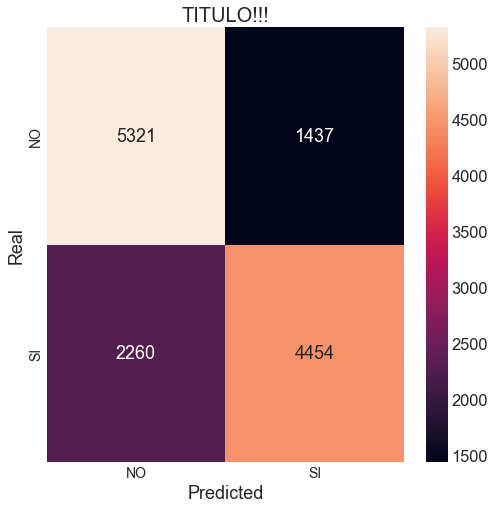

In [21]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize = (8,8))

sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), annot = True, fmt = '4d')

plt.title("TITULO!!!", fontsize = 20)
plt.xlabel("Predicted", fontsize = 18)
plt.ylabel('Real', fontsize = 18)

plt.xticks(ticks = [0.5, 1.5], labels = ["NO", "SI"], fontsize = 14)
plt.yticks(ticks = [0.5, 1.5], labels = ["NO", "SI"], fontsize = 14)

plt.show()

ALGUNA APRECIACION DEL GRAFICO??? DIFERENCIA MEJOR LOS QUE SON VERDADEROS POSITIVOS

In [22]:
# ACA QUE SE HACE??

y_train_pred_proba_lr = lr.predict_proba(X_train_std)[:, 1]
y_test_pred_proba_lr = lr.predict_proba(X_test_std)[:, 1]

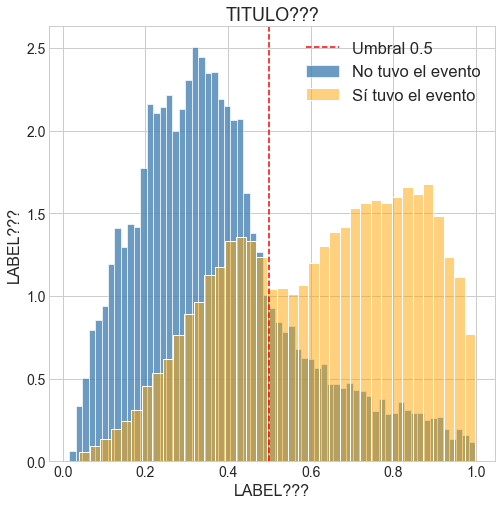

In [23]:
# Histograma de probabilidades

plt.figure(figsize = (8,8))

sns.histplot(data = lr.predict_proba(X_train_std[y_train == 0])[:,1], stat = 'density', color = "steelblue", alpha = 0.8)
sns.histplot(data = lr.predict_proba(X_train_std[y_train == 1])[:,1], stat = 'density', color = "orange", alpha = 0.5)

ylim = plt.ylim()
plt.ylim(ylim)

plt.vlines(0.5, ylim[0], ylim[1], linestyle = "--", color = "red")

plt.title("TITULO???", fontsize = 18)
plt.xlabel("LABEL???", fontsize = 16)
plt.ylabel("LABEL???", fontsize = 16) 

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.legend(['Umbral 0.5', "No tuvo el evento",  "Sí tuvo el evento"])

plt.show()

APRECIACION DEL GRAFICO

In [24]:
print("Accuracy:", accuracy_score(y_test, y_test_pred_lr).round(2))
print("F1 Score:", f1_score(y_test, y_test_pred_lr).round(2))
print("precision_score:", precision_score(y_test, y_test_pred_lr).round(2))
print("recall_score:", recall_score(y_test, y_test_pred_lr).round(2))
print("auc_score from train:", roc_auc_score(y_train, y_train_pred_proba_lr).round(3))
print("auc_score from test:", roc_auc_score(y_test, y_test_pred_proba_lr).round(3))

Accuracy: 0.73
F1 Score: 0.71
precision_score: 0.76
recall_score: 0.66
auc_score from train: 0.793
auc_score from test: 0.791


APRECIACION DE ESTOS VALORES

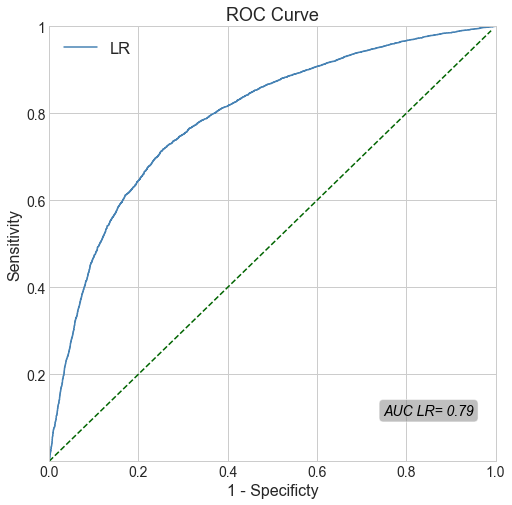

In [25]:
# ESTO QUE HACE?
fpr_lr, tpr_lr, thr_lr = roc_curve(y_test, y_test_pred_proba_lr) # ACA DECIA (y_test, y_test_pred)

plt.figure(figsize = (8,8))

plt.plot(fpr_lr, tpr_lr, color = "steelblue", label = "LR")
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01), color = "darkgreen", linestyle = "--")

plt.title('ROC Curve', fontsize = 18) 
plt.xlabel('1 - Specificty', fontsize = 16)
plt.ylabel('Sensitivity', fontsize = 16)

plt.ylim(0,1)
plt.xlim(0,1)
plt.yticks(ticks = [0,0.2,0.4,0.6,0.8,1], labels = ["",0.2,0.4,0.6,0.8,1], fontsize = 14)
plt.xticks(fontsize = 14)

plt.legend('LR') # LR qué es??

style = dict(size = 14, color = 'black', fontstyle = "oblique")
props = dict(boxstyle = 'round', facecolor = 'grey', alpha=0.5)

plt.text(0.85, 0.1, f"AUC LR= {round(auc(fpr_lr, tpr_lr),2)}", ha = "center", va = "bottom", **style, bbox = props)

plt.legend()

plt.show()

APRECIACION DEL GRAFICO

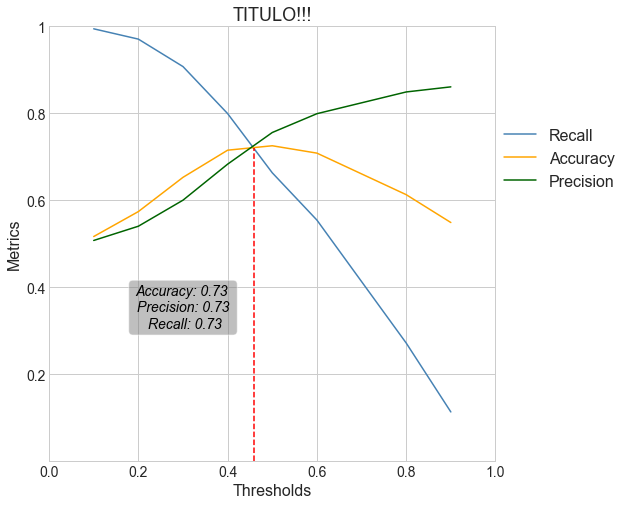

In [26]:
recalls_lr = []
accuracy_lr = []
precision_lr = []
aucs_lr = []

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9]

probs_test_lr = lr.predict_proba(X_test_std)[:,1]

for th in thresholds:
    y_pred_test_umbral_lr = probs_test_lr > th
    rec_lr = recall_score(y_test, y_pred_test_umbral_lr)
    acc_lr = accuracy_score(y_test, y_pred_test_umbral_lr)
    pres_lr = precision_score(y_test, y_pred_test_umbral_lr)    
    
    recalls_lr.append(rec_lr)
    accuracy_lr.append(acc_lr)
    precision_lr.append(pres_lr)
    
plt.figure(figsize = (8,8)) 

# plot the recalls values
plt.plot(thresholds, recalls_lr, color = "steelblue", label = "Recall")
plt.plot(thresholds, accuracy_lr, color = "orange", label = "Accuracy")
plt.plot(thresholds, precision_lr, color = "darkgreen", label = "Precision")

#plt.legend(['recall', 'accuracy', 'precision'])

plt.title("TITULO!!!", fontsize = 18)
plt.xlabel("Thresholds", fontsize = 16)
plt.ylabel("Metrics", fontsize = 16)


plt.ylim(0,1)
plt.xlim(0,1)
plt.yticks(ticks = [0,0.2,0.4,0.6,0.8,1], labels = ["",0.2,0.4,0.6,0.8,1], fontsize = 14)
plt.xticks(fontsize = 14)

# Agregando texto porque a ojo veo que el corte es 0.46
umbral_lr = 0.45
y_pred_test_umbral_final_lr = probs_test_lr > umbral_lr

# Scores que van a aprecer en el texto on umbral 46
accuracy_lr = accuracy_score(y_test, y_pred_test_umbral_final_lr).round(2)
precision_lr = precision_score(y_test, y_pred_test_umbral_final_lr).round(2)
recall_lr = recall_score(y_test, y_pred_test_umbral_final_lr).round(2)

style = dict(size = 14, color = 'black', fontstyle = "oblique")
props = dict(boxstyle = 'round', facecolor = 'grey', alpha=0.5)

plt.text(0.3, 0.3, f"Accuracy: {accuracy_lr} \n Precision: {precision_lr} \n Recall: {recall_lr}", ha = "center", va = "bottom", **style, bbox = props)
plt.axvline(0.46, color = "red", linestyle = "--", ymax = 0.72)

plt.legend(fontsize = 16, bbox_to_anchor = (1.3, 0.8))

plt.show() 

APRECIACION DEL GRAFICO

<a id='4'></a>

---

# 4. Naive Bayes

In [27]:
# We instantiate the model
gnb =  GaussianNB()

In [28]:
#Model Fitting
gnb.fit(X_train_std, y_train)

y_train_pred_gnb = gnb.predict(X_train_std)
y_test_pred_gnb = gnb.predict(X_test_std)

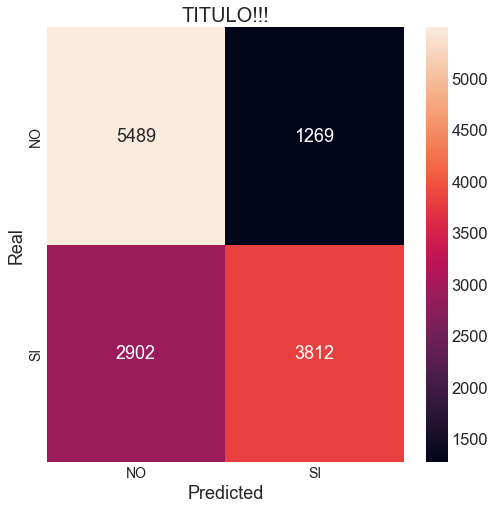

In [29]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize = (8,8))

sns.heatmap(confusion_matrix(y_test, y_test_pred_gnb), annot = True, fmt = '4d')

plt.title("TITULO!!!", fontsize = 20)
plt.xlabel("Predicted", fontsize = 18)
plt.ylabel('Real', fontsize = 18)

plt.xticks(ticks = [0.5, 1.5], labels = ["NO", "SI"], fontsize = 14)
plt.yticks(ticks = [0.5, 1.5], labels = ["NO", "SI"], fontsize = 14)

plt.show()

ALGUNA APRECIACION DEL GRAFICO??? DIFERENCIA MEJOR LOS QUE SON VERDADEROS NEGATIVOS

In [30]:
# ACA QUE SE HACE??

y_train_pred_proba_gnb = gnb.predict_proba(X_train_std)[:, 1]
y_test_pred_proba_gnb = gnb.predict_proba(X_test_std)[:, 1]

In [31]:
print("Accuracy:", accuracy_score(y_test, y_test_pred_gnb).round(2))
print("F1 Score:", f1_score(y_test, y_test_pred_gnb).round(2))
print("precision_score:", precision_score(y_test, y_test_pred_gnb).round(2))
print("recall_score:", recall_score(y_test, y_test_pred_gnb).round(2))
print("auc_score from train:", roc_auc_score(y_train, y_train_pred_proba_gnb).round(3))
print("auc_score from test:", roc_auc_score(y_test, y_test_pred_proba_gnb).round(3))

Accuracy: 0.69
F1 Score: 0.65
precision_score: 0.75
recall_score: 0.57
auc_score from train: 0.771
auc_score from test: 0.769


APRECIACION DE ESTOS VALORES

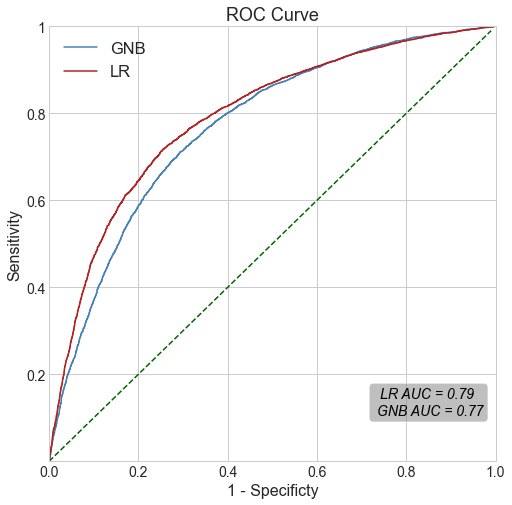

In [32]:
# ESTO QUE HACE?
fpr_gnb, tpr_gnb, thr_gnb = roc_curve(y_test, y_test_pred_proba_gnb) # ACA DECIA (y_test, y_test_pred)

plt.figure(figsize = (8,8))

plt.plot(fpr_gnb, tpr_gnb, color = "steelblue", label = "GNB")
plt.plot(fpr_lr, tpr_lr, color = "firebrick", label = "LR")
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01), color = "darkgreen", linestyle = "--")

plt.title('ROC Curve', fontsize = 18) 
plt.xlabel('1 - Specificty', fontsize = 16)
plt.ylabel('Sensitivity', fontsize = 16)

plt.ylim(0,1)
plt.xlim(0,1)
plt.yticks(ticks = [0,0.2,0.4,0.6,0.8,1], labels = ["",0.2,0.4,0.6,0.8,1], fontsize = 14)
plt.xticks(fontsize = 14)

plt.legend() 

style = dict(size = 14, color = 'black', fontstyle = "oblique")
props = dict(boxstyle = 'round', facecolor = 'grey', alpha=0.5)

plt.text(0.85, 0.1, f"LR AUC = {round(auc(fpr_lr, tpr_lr),2)} \n GNB AUC = {round(auc(fpr_gnb, tpr_gnb),2)}", ha = "center", va = "bottom", **style, bbox = props)

plt.show()

APRECIACION DEL GRAFICO

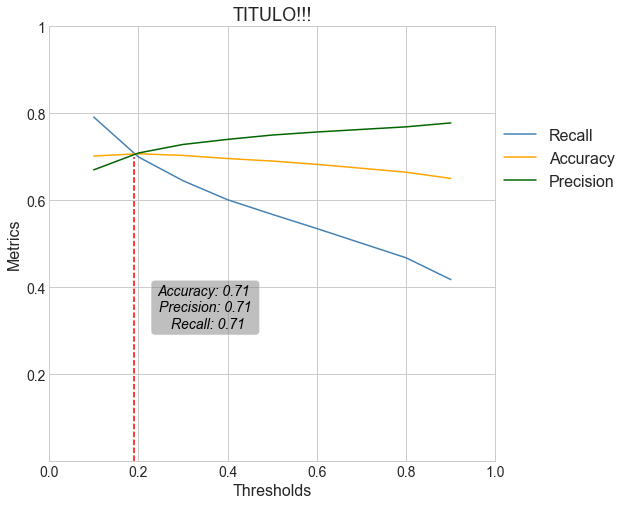

In [33]:
recalls_gnb = []
accuracy_gnb = []
precision_gnb = []
aucs_gnb = []

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9]

probs_test_gnb = gnb.predict_proba(X_test_std)[:,1]

for th in thresholds:
    y_pred_test_umbral_gnb = probs_test_gnb > th
    rec_gnb = recall_score(y_test, y_pred_test_umbral_gnb)
    acc_gnb = accuracy_score(y_test, y_pred_test_umbral_gnb)
    pres_gnb = precision_score(y_test, y_pred_test_umbral_gnb)    
    
    recalls_gnb.append(rec_gnb)
    accuracy_gnb.append(acc_gnb)
    precision_gnb.append(pres_gnb)
    
plt.figure(figsize = (8,8)) 

# plot the recalls values
plt.plot(thresholds, recalls_gnb, color = "steelblue", label = "Recall")
plt.plot(thresholds, accuracy_gnb, color = "orange", label = "Accuracy")
plt.plot(thresholds, precision_gnb, color = "darkgreen", label = "Precision")

#plt.legend(['recall', 'accuracy', 'precision'])

plt.title("TITULO!!!", fontsize = 18)
plt.xlabel("Thresholds", fontsize = 16)
plt.ylabel("Metrics", fontsize = 16)


plt.ylim(0,1)
plt.xlim(0,1)
plt.yticks(ticks = [0,0.2,0.4,0.6,0.8,1], labels = ["",0.2,0.4,0.6,0.8,1], fontsize = 14)
plt.xticks(fontsize = 14)

# Agregando texto porque a ojo veo que el corte es 0.46
umbral_gnb = 0.19
y_pred_test_umbral_final_gnb = probs_test_gnb > umbral_gnb

# Scores que van a aprecer en el texto on umbral 46
accuracy_gnb = accuracy_score(y_test, y_pred_test_umbral_final_gnb).round(2)
precision_gnb = precision_score(y_test, y_pred_test_umbral_final_gnb).round(2)
recall_gnb = recall_score(y_test, y_pred_test_umbral_final_gnb).round(2)

style = dict(size = 14, color = 'black', fontstyle = "oblique")
props = dict(boxstyle = 'round', facecolor = 'grey', alpha=0.5)

plt.text(0.35, 0.3, f"Accuracy: {accuracy_gnb} \n Precision: {precision_gnb} \n Recall: {recall_gnb}", ha = "center", va = "bottom", **style, bbox = props)
plt.axvline(0.19, color = "red", linestyle = "--", ymax = 0.7)

plt.legend(fontsize = 16, bbox_to_anchor = (1.3, 0.8))

plt.show() 

<a id='5'></a>

---

# 5. KNN

In [34]:
# We instantiate the model

knn = KNeighborsClassifier(n_neighbors = 100)

In [35]:
#Model Fitting
knn.fit(X_train_std, y_train)

y_train_pred_knn = knn.predict(X_train_std)
y_test_pred_knn = knn.predict(X_test_std)

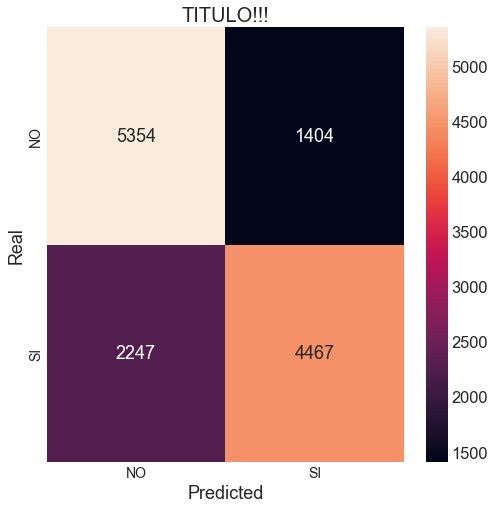

In [36]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize = (8,8))

sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot = True, fmt = '4d')

plt.title("TITULO!!!", fontsize = 20)
plt.xlabel("Predicted", fontsize = 18)
plt.ylabel('Real', fontsize = 18)

plt.xticks(ticks = [0.5, 1.5], labels = ["NO", "SI"], fontsize = 14)
plt.yticks(ticks = [0.5, 1.5], labels = ["NO", "SI"], fontsize = 14)

plt.show()

ALGUNA APRECIACION DEL GRAFICO??? DIFERENCIA MEJOR LOS QUE SON VERDADEROS NEGATIVOS

In [37]:
# ACA QUE SE HACE??

y_train_pred_proba_knn = knn.predict_proba(X_train_std)[:, 1]
y_test_pred_proba_knn = knn.predict_proba(X_test_std)[:, 1]

In [38]:
print("Accuracy:", accuracy_score(y_test, y_test_pred_knn).round(2))
print("F1 Score:", f1_score(y_test, y_test_pred_knn).round(2))
print("precision_score:", precision_score(y_test, y_test_pred_knn).round(2))
print("recall_score:", recall_score(y_test, y_test_pred_knn).round(2))
print("auc_score from train:", roc_auc_score(y_train, y_train_pred_proba_knn).round(3))
print("auc_score from test:", roc_auc_score(y_test, y_test_pred_proba_knn).round(3))

Accuracy: 0.73
F1 Score: 0.71
precision_score: 0.76
recall_score: 0.67
auc_score from train: 0.802
auc_score from test: 0.793


APRECIACION DE ESTOS VALORES

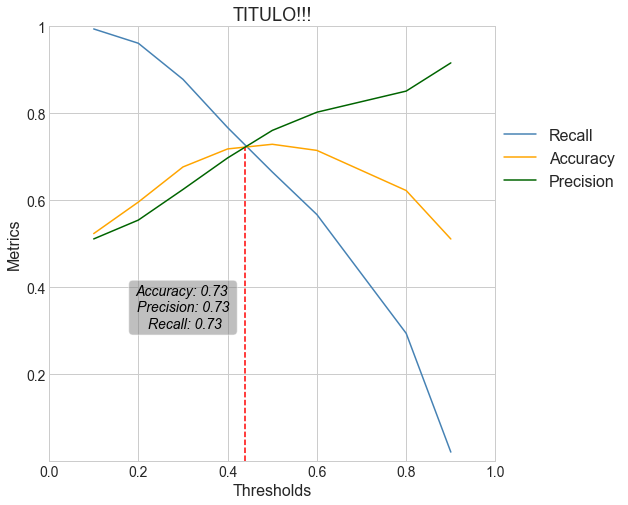

In [39]:
recalls_knn = []
accuracy_knn = []
precision_knn = []
aucs_knn = []

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9]

probs_test_knn = knn.predict_proba(X_test_std)[:,1]

for th in thresholds:
    y_pred_test_umbral_knn = probs_test_knn > th
    rec_knn = recall_score(y_test, y_pred_test_umbral_knn)
    acc_knn = accuracy_score(y_test, y_pred_test_umbral_knn)
    pres_knn = precision_score(y_test, y_pred_test_umbral_knn)    
    
    recalls_knn.append(rec_knn)
    accuracy_knn.append(acc_knn)
    precision_knn.append(pres_knn)
    
plt.figure(figsize = (8,8)) 

# plot the recalls values
plt.plot(thresholds, recalls_knn, color = "steelblue", label = "Recall")
plt.plot(thresholds, accuracy_knn, color = "orange", label = "Accuracy")
plt.plot(thresholds, precision_knn, color = "darkgreen", label = "Precision")

#plt.legend(['recall', 'accuracy', 'precision'])

plt.title("TITULO!!!", fontsize = 18)
plt.xlabel("Thresholds", fontsize = 16)
plt.ylabel("Metrics", fontsize = 16)


plt.ylim(0,1)
plt.xlim(0,1)
plt.yticks(ticks = [0,0.2,0.4,0.6,0.8,1], labels = ["",0.2,0.4,0.6,0.8,1], fontsize = 14)
plt.xticks(fontsize = 14)

# Agregando texto porque a ojo veo que el corte es 0.46
umbral_knn = 0.44
y_pred_test_umbral_final_knn = probs_test_knn > umbral_knn

# Scores que van a aprecer en el texto on umbral 46
accuracy_knn = accuracy_score(y_test, y_pred_test_umbral_final_knn).round(2)
precision_knn = precision_score(y_test, y_pred_test_umbral_final_knn).round(2)
recall_knn = recall_score(y_test, y_pred_test_umbral_final_knn).round(2)

style = dict(size = 14, color = 'black', fontstyle = "oblique")
props = dict(boxstyle = 'round', facecolor = 'grey', alpha=0.5)

plt.text(0.3, 0.3, f"Accuracy: {accuracy_knn} \n Precision: {precision_knn} \n Recall: {recall_knn}", ha = "center", va = "bottom", **style, bbox = props)
plt.axvline(0.44, color = "red", linestyle = "--", ymax = 0.72)

plt.legend(fontsize = 16, bbox_to_anchor = (1.3, 0.8))

plt.show()

<a id='5.1'></a>

## 5.1 K between 1 and 25

In [40]:
start = time.time()

k_range = list(range(1, 20))
auc_train = []
auc_test = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_std, y_train)
    
    y_train_pred_proba_knn = knn.predict_proba(X_train_std)[:, 1]
    y_test_pred_proba_knn = knn.predict_proba(X_test_std)[:, 1]
     
    auc_train.append(roc_auc_score(y_train, y_train_pred_proba_knn))
    auc_test.append(roc_auc_score(y_test, y_test_pred_proba_knn))

end = time.time()
print(end - start) # 25 minutos

1589.967874288559


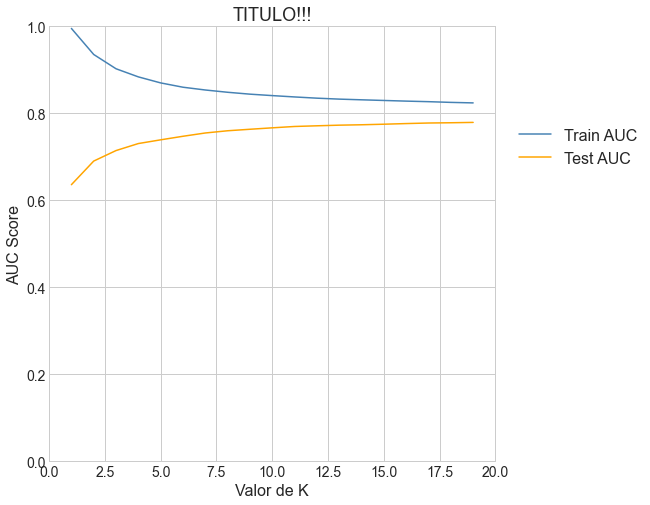

In [41]:
plt.style.use("seaborn-whitegrid")

fig, ax = plt.subplots(figsize = (8, 8))

plt.plot(k_range, auc_train, color = "steelblue", label = "Train AUC")
plt.plot(k_range, auc_test, color = "orange", label = "Test AUC")

plt.title("TITULO!!!", fontsize = 18)
plt.xlabel('Valor de K', fontsize = 16)
plt.ylabel('AUC Score', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0, 1)
plt.xlim(0, 20)

plt.legend(fontsize = 16, bbox_to_anchor = (1.35, 0.8))

plt.show()

In [42]:
l =  [i for i, val in enumerate(auc_train) if val == max(auc_train)]
print('Mínimo K de todos los que tienen máximo AUC score: ', min(l) + 1)
print('Máximo K de todos los que tienen máximo AUC score: ', max(l) + 1)
print("AUC train:", auc_train)

Mínimo K de todos los que tienen máximo AUC score:  1
Máximo K de todos los que tienen máximo AUC score:  1
AUC train: [0.9954345945842982, 0.9354611254395314, 0.9026261856589961, 0.8839608683577823, 0.8700928799509271, 0.8601801343453703, 0.8538102451518786, 0.848570653604329, 0.8442286007603819, 0.8409185115557549, 0.8378288173952195, 0.8350128068110889, 0.8328248582891736, 0.8312483603594746, 0.8297308628337488, 0.8282383293485779, 0.826956151568138, 0.8253143139040957, 0.8241362019759254]


In [43]:
l =  [i for i, val in enumerate(auc_test) if val == max(auc_test)]
print('Mínimo K de todos los que tienen máximo AUC score: ', min(l) + 1)
print('Máximo K de todos los que tienen máximo AUC score: ', max(l) + 1)
print("AUC test:", auc_test)

Mínimo K de todos los que tienen máximo AUC score:  19
Máximo K de todos los que tienen máximo AUC score:  19
AUC test: [0.6360505180898368, 0.690372129705078, 0.7145588128078744, 0.7306693429594537, 0.7392258123581817, 0.7474019251711781, 0.7549632809773308, 0.7600749534769546, 0.763516124888844, 0.7668194726879817, 0.7699253251015159, 0.7714731546887181, 0.7729351516925891, 0.7738494136143592, 0.7751277229392532, 0.776608442443969, 0.7778890438702026, 0.7784816181847563, 0.7792939146560751]


Me quedo con K = 19

<a id='5.2'></a>

## 5.2 GridSearchCV

In [44]:
grid_params = {"n_neighbors": [5,10,15,20,25],
               "weights": ["uniform", "distance"],
               "metric": ["euclidean", "manhattan"]}

In [45]:
gs_knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1, scoring = "roc_auc")

In [46]:
start = time.time()

gs_knn.fit(X_train_std, y_train)

end = time.time()
print(end - start) # 25 minutos

Fitting 3 folds for each of 20 candidates, totalling 60 fits
1259.8643894195557


In [47]:
gs_knn.best_score_

0.7861472369625299

In [48]:
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'uniform'}

In [49]:
gs_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=25)

In [50]:
best_model_knn = gs_knn.best_estimator_

In [51]:
y_train_pred_proba_knn = best_model_knn.predict_proba(X_train_std)[:, 1]
y_test_pred_proba_knn = best_model_knn.predict_proba(X_test_std)[:, 1]

train_roc_auc_knn = roc_auc_score(y_train, y_train_pred_proba_knn)
test_roc_auc_knn = roc_auc_score(y_test, y_test_pred_proba_knn)

print('Train set ROC AUC score: {:.3f}'.format(train_roc_auc_knn))
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc_knn))

Train set ROC AUC score: 0.819
Test set ROC AUC score: 0.785


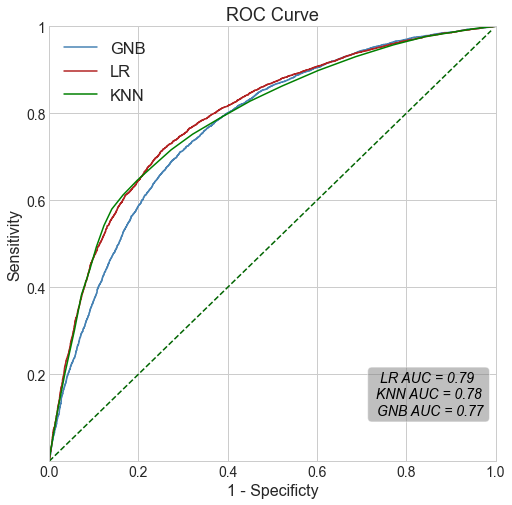

In [52]:
# ESTO QUE HACE?
fpr_gnb, tpr_gnb, thr_gnb = roc_curve(y_test, y_test_pred_proba_gnb) # ACA DECIA (y_test, y_test_pred)
fpr_lr, tpr_lr, thr_lr = roc_curve(y_test, y_test_pred_proba_lr)
fpr_knn, tpr_knn, thr_knn = roc_curve(y_test, y_test_pred_proba_knn)

plt.figure(figsize = (8,8))

plt.plot(fpr_gnb, tpr_gnb, color = "steelblue", label = "GNB")
plt.plot(fpr_lr, tpr_lr, color = "firebrick", label = "LR")
plt.plot(fpr_knn, tpr_knn, color = "green", label = "KNN")

plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01), color = "darkgreen", linestyle = "--")

plt.title('ROC Curve', fontsize = 18) 
plt.xlabel('1 - Specificty', fontsize = 16)
plt.ylabel('Sensitivity', fontsize = 16)

plt.ylim(0,1)
plt.xlim(0,1)
plt.yticks(ticks = [0,0.2,0.4,0.6,0.8,1], labels = ["",0.2,0.4,0.6,0.8,1], fontsize = 14)
plt.xticks(fontsize = 14)

plt.legend() # LR qué es??

style = dict(size = 14, color = 'black', fontstyle = "oblique")
props = dict(boxstyle = 'round', facecolor = 'grey', alpha=0.5)

plt.text(0.85, 0.1, f"LR AUC = {round(auc(fpr_lr, tpr_lr),2)} \n KNN AUC = {round(auc(fpr_knn, tpr_knn),2)} \n GNB AUC = {round(auc(fpr_gnb, tpr_gnb),2)}", ha = "center", va = "bottom", **style, bbox = props)

plt.show()

<a id='6'></a>

---

# 6. RANDOM FOREST

<a id='6.1'></a>

## 6.1 Generating validation curves

<a id='6.1.A'></a>

### A. n_estimators

In [54]:
param_range = [10, 100, 500, 1000, 1500]

In [55]:
start = time.time()

# Creo ejes del gráfico

eje_x = []
eje_y_train = []
eje_y_test = []

for i in param_range:    
    # Instancio el modelo
    rf_clf = RandomForestClassifier(n_estimators = i)
    
    # Fiteo
    rf_clf.fit(X_train_std, y_train)
    
    # Predicción
    y_train_pred_proba_rf = rf_clf.predict_proba(X_train_std)[:, 1]
    y_test_pred_proba_rf = rf_clf.predict_proba(X_test_std)[:, 1]

    # ROC
    train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_proba_rf)
    test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)
    
    # Agrego a las listas
    eje_x.append(i)
    eje_y_train.append(train_roc_auc_rf)
    eje_y_test.append(test_roc_auc_rf)
    
end = time.time()
print(end - start)

In [56]:
eje_y_test

[0.7378392122647169,
 0.7566542567010685,
 0.7591325251560326,
 0.7590466815529833,
 0.7592213991815258]

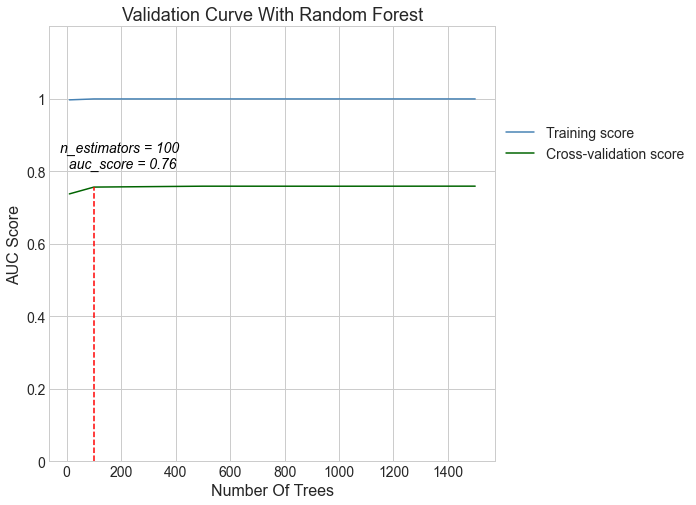

In [57]:
plt.style.use("seaborn-whitegrid")

plt.subplots(1, figsize=(8,8))

plt.plot(eje_x, eje_y_train, label = "Training score", color = "steelblue")
plt.plot(eje_x, eje_y_test, label = "Cross-validation score", color = "darkgreen")

plt.title("Validation Curve With Random Forest", fontsize = 18)
plt.xlabel("Number Of Trees", fontsize = 16)
plt.ylabel("AUC Score", fontsize = 16)

plt.yticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = [0, 0.2, 0.4, 0.6, 0.8, 1], fontsize = 14) 
plt.xticks(fontsize = 14)
plt.ylim(0, 1.2)

plt.axvline(100, color = "red", linestyle = "--", ymax = 0.63)
style = dict(size = 14, color = 'black', fontstyle = "oblique")
plt.text(200, 0.8, f"n_estimators = 100 \n auc_score = {eje_y_test[1].round(2)}", ha = "center", va = "bottom", **style)


plt.legend(fontsize = 14, bbox_to_anchor = (1.45, 0.8))

plt.show()

A partir de 100 árboles no tiene sentido aumentar

<a id='6.1.B'></a>

### B. max_depth

In [58]:
max_depth = [10,20,30,40,50,60,70,80,90,100]

In [59]:
start = time.time()

# Creo ejes del gráfico

eje_x = []
eje_y_train = []
eje_y_test = []

for i in max_depth:    
    # Instancio el modelo
    rf_clf = RandomForestClassifier(max_depth = i)
    
    # Fiteo
    rf_clf.fit(X_train_std, y_train)
    
    # Predicción
    y_train_pred_proba_rf = rf_clf.predict_proba(X_train_std)[:, 1]
    y_test_pred_proba_rf = rf_clf.predict_proba(X_test_std)[:, 1]

    # ROC
    train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_proba_rf)
    test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)
    
    # Agrego a las listas
    eje_x.append(i)
    eje_y_train.append(train_roc_auc_rf)
    eje_y_test.append(test_roc_auc_rf)
    
end = time.time()
print(end - start)

204.99220395088196


In [60]:
eje_y_test

[0.8000766178951579,
 0.7870016343564128,
 0.7625196338315214,
 0.7571516977903173,
 0.7564702604699884,
 0.7566039737279344,
 0.7568009071079209,
 0.757104136687524,
 0.7580226191612796,
 0.7564415761440914]

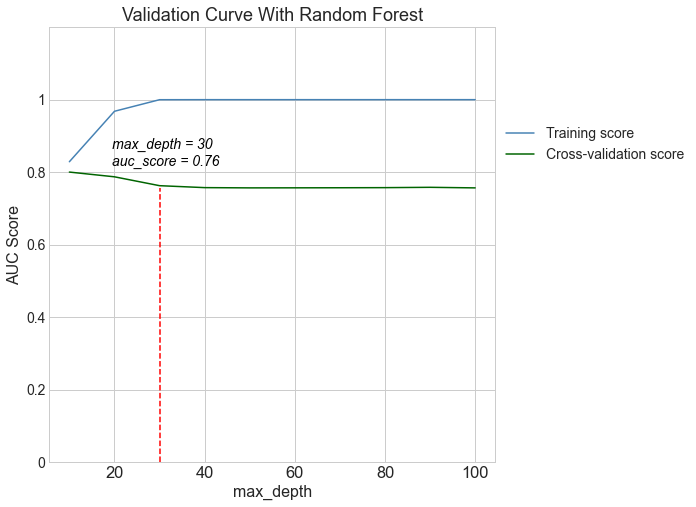

In [61]:
plt.style.use("seaborn-whitegrid")

plt.subplots(1, figsize=(8,8))

plt.plot(eje_x, eje_y_train, label = "Training score", color = "steelblue")
plt.plot(eje_x, eje_y_test, label = "Cross-validation score", color = "darkgreen")

plt.title("Validation Curve With Random Forest", fontsize = 18)
plt.xlabel("max_depth", fontsize = 16)
plt.ylabel("AUC Score", fontsize = 16)

plt.yticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = [0, 0.2, 0.4, 0.6, 0.8, 1], fontsize = 14) 
plt.ylim(0, 1.2)

plt.axvline(30, color = "red", linestyle = "--", ymax = 0.63)
style = dict(size = 14, color = 'black', fontstyle = "oblique")
plt.text(31, 0.81, f"max_depth = 30 \n auc_score = {eje_y_test[2].round(2)}", ha = "center", va = "bottom", **style)


plt.legend(fontsize = 14, bbox_to_anchor = (1.45, 0.8))

plt.show()

Ya a partir de 25/30 no tiene sentido aumentar el depth elijo 25

<a id='6.1.C'></a>

### C. min_samples_split

In [62]:
min_samples_split = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [63]:
start = time.time()

# Creo ejes del gráfico

eje_x = []
eje_y_train = []
eje_y_test = []

for i in min_samples_split:    
    # Instancio el modelo
    rf_clf = RandomForestClassifier(min_samples_split = i)
    
    # Fiteo
    rf_clf.fit(X_train_std, y_train)
    
    # Predicción
    y_train_pred_proba_rf = rf_clf.predict_proba(X_train_std)[:, 1]
    y_test_pred_proba_rf = rf_clf.predict_proba(X_test_std)[:, 1]

    # ROC
    train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_proba_rf)
    test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)
    
    # Agrego a las listas
    eje_x.append(i)
    eje_y_train.append(train_roc_auc_rf)
    eje_y_test.append(test_roc_auc_rf)
    
end = time.time()
print(end - start)

192.76494765281677


In [64]:
eje_y_test

[0.7573772714173289,
 0.7734344551141762,
 0.7842749814582225,
 0.7892989921013306,
 0.7919202634364964,
 0.792658727797362,
 0.7940811970728455,
 0.7954422424403191,
 0.7958590302136864,
 0.7968581880427597,
 0.796816291075007]

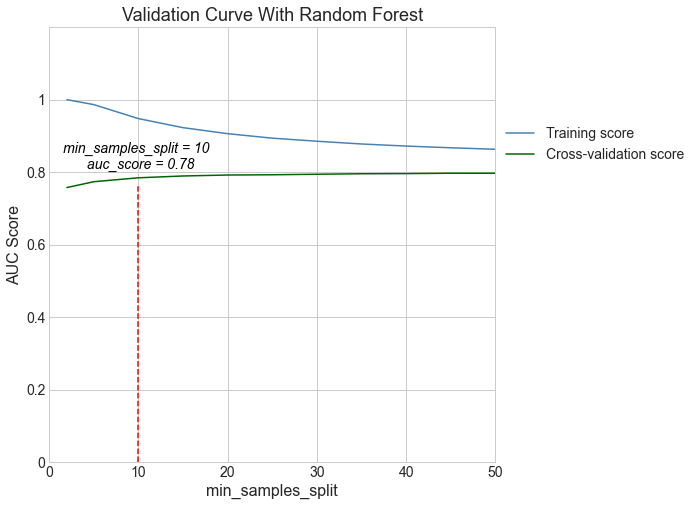

In [65]:
plt.style.use("seaborn-whitegrid")

plt.subplots(1, figsize=(8,8))

plt.plot(eje_x, eje_y_train, label = "Training score", color = "steelblue")
plt.plot(eje_x, eje_y_test, label = "Cross-validation score", color = "darkgreen")

plt.title("Validation Curve With Random Forest", fontsize = 18)
plt.xlabel("min_samples_split", fontsize = 16)
plt.ylabel("AUC Score", fontsize = 16)

plt.yticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = [0, 0.2, 0.4, 0.6, 0.8, 1], fontsize = 14) 
plt.xticks(fontsize = 14)
plt.ylim(0, 1.2)
plt.xlim(0,50)

plt.axvline(10, color = "red", linestyle = "--", ymax = 0.64)
style = dict(size = 14, color = 'black', fontstyle = "oblique")
plt.text(10, 0.8, f"min_samples_split = 10 \n auc_score = {eje_y_test[2].round(2)}", ha = "center", va = "bottom", **style)


plt.legend(fontsize = 14, bbox_to_anchor = (1.45, 0.8))

plt.show()

min_samples_split en 10

<a id='6.1.D'></a>

### D. min_samples_leaf

In [66]:
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

In [67]:
start = time.time()

# Creo ejes del gráfico

eje_x = []
eje_y_train = []
eje_y_test = []

for i in min_samples_leaf:    
    # Instancio el modelo
    rf_clf = RandomForestClassifier(min_samples_leaf = i)
    
    # Fiteo
    rf_clf.fit(X_train_std, y_train)
    
    # Predicción
    y_train_pred_proba_rf = rf_clf.predict_proba(X_train_std)[:, 1]
    y_test_pred_proba_rf = rf_clf.predict_proba(X_test_std)[:, 1]

    # ROC
    train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_proba_rf)
    test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)
    
    # Agrego a las listas
    eje_x.append(i)
    eje_y_train.append(train_roc_auc_rf)
    eje_y_test.append(test_roc_auc_rf)
    
end = time.time()
print(end - start)

235.77411031723022


In [68]:
eje_y_test

[0.755487213468599,
 0.7860407149487235,
 0.7952996472896827,
 0.797219160944568,
 0.79823805508854,
 0.799071851029634,
 0.7997268851056875,
 0.7997017821881334,
 0.8005014721020852,
 0.8001733269401337,
 0.7999892205118738,
 0.8000614106843482,
 0.8004353427744988,
 0.799778347188645,
 0.8006015201216083,
 0.8005700698464988]

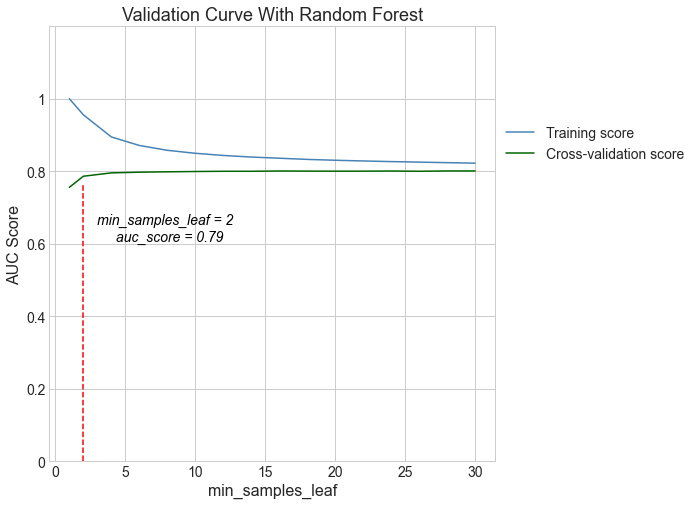

In [69]:
plt.style.use("seaborn-whitegrid")

plt.subplots(1, figsize=(8,8))

plt.plot(eje_x, eje_y_train, label = "Training score", color = "steelblue")
plt.plot(eje_x, eje_y_test, label = "Cross-validation score", color = "darkgreen")

plt.title("Validation Curve With Random Forest", fontsize = 18)
plt.xlabel("min_samples_leaf", fontsize = 16)
plt.ylabel("AUC Score", fontsize = 16)

plt.yticks(ticks = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = [0, 0.2, 0.4, 0.6, 0.8, 1], fontsize = 14) 
plt.xticks(fontsize = 14)
plt.ylim(0, 1.2)

plt.axvline(2, color = "red", linestyle = "--", ymax = 0.64)
style = dict(size = 14, color = 'black', fontstyle = "oblique")
plt.text(8, 0.6, f"min_samples_leaf = 2 \n auc_score = {eje_y_test[1].round(2)}", ha = "center", va = "bottom", **style)


plt.legend(fontsize = 14, bbox_to_anchor = (1.45, 0.8))

plt.show()

Dejaría en 2

<a id='6.1.E'></a>

### E. All combined

Primero con auto

In [70]:
rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_split = 10, min_samples_leaf = 2, max_features = "auto")

In [71]:
start = time.time()

# Fiteo
rf_clf.fit(X_train_std, y_train)

end = time.time()
print(end - start)

13.781807661056519


In [72]:
# Predicción
y_train_pred_proba_rf = rf_clf.predict_proba(X_train_std)[:, 1]
y_test_pred_proba_rf = rf_clf.predict_proba(X_test_std)[:, 1]

In [73]:
# ROC
train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_proba_rf)
test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)

print("Train:", train_roc_auc_rf)
print("Test:", test_roc_auc_rf)

Train: 0.9157859804984291
Test: 0.7923585176204849


Segundo con sqrt

In [74]:
rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_split = 10, min_samples_leaf = 2, max_features = "sqrt")

In [75]:
# Fiteo
rf_clf.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10)

In [76]:
# Predicción
y_train_pred_proba_rf = rf_clf.predict_proba(X_train_std)[:, 1]
y_test_pred_proba_rf = rf_clf.predict_proba(X_test_std)[:, 1]

In [77]:
# ROC
train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_proba_rf)
test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)

print("Train:", train_roc_auc_rf)
print("Test:", test_roc_auc_rf)

Train: 0.915381330929931
Test: 0.7915087320686047


Son casi idénticos los resultados

<a id='6.2'></a>

## 6.2 RandomSearch

In [79]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6, 8, 10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [80]:
start = time.time()

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = "roc_auc")
# Fit the random search model
rf_random.fit(X_train_std, y_train)

end = time.time()
print(end - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
636.1163010597229


In [81]:
rf_random.best_params_ 

{'n_estimators': 178,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [82]:
best_model_rf = rf_random.best_estimator_
best_model_rf

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=178)

In [83]:
y_train_pred_proba_rf = best_model_rf.predict_proba(X_train_std)[:, 1]
y_test_pred_proba_rf = best_model_rf.predict_proba(X_test_std)[:, 1]

train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_proba_rf)
test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)

print('Train set ROC AUC score: {:.3f}'.format(train_roc_auc_rf))
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc_rf))

Train set ROC AUC score: 0.827
Test set ROC AUC score: 0.801


Me quedo con el RandomSearch

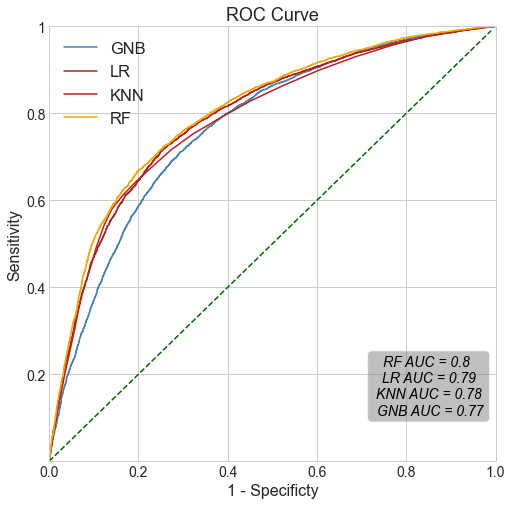

In [84]:
# ESTO QUE HACE?

fpr_rf, tpr_rf, thr_rf = roc_curve(y_test, y_test_pred_proba_rf)
fpr_lr, tpr_lr, thr_lr = roc_curve(y_test, y_test_pred_proba_lr)
fpr_gnb, tpr_gnb, thr_gnb = roc_curve(y_test, y_test_pred_proba_gnb) 
fpr_knn, tpr_knn, thr_knn = roc_curve(y_test, y_test_pred_proba_knn)

plt.figure(figsize = (8,8))

plt.plot(fpr_gnb, tpr_gnb, color = "steelblue", label = "GNB")
plt.plot(fpr_lr, tpr_lr, color = "firebrick", label = "LR")
plt.plot(fpr_knn, tpr_knn, color = "firebrick", label = "KNN")
plt.plot(fpr_rf, tpr_rf, color = "orange", label = "RF")

plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01), color = "darkgreen", linestyle = "--")

plt.title('ROC Curve', fontsize = 18) 
plt.xlabel('1 - Specificty', fontsize = 16)
plt.ylabel('Sensitivity', fontsize = 16)

plt.ylim(0,1)
plt.xlim(0,1)
plt.yticks(ticks = [0,0.2,0.4,0.6,0.8,1], labels = ["",0.2,0.4,0.6,0.8,1], fontsize = 14)
plt.xticks(fontsize = 14)

plt.legend() # LR qué es??

style = dict(size = 14, color = 'black', fontstyle = "oblique")
props = dict(boxstyle = 'round', facecolor = 'grey', alpha=0.5)

plt.text(0.85, 0.1, f"RF AUC = {round(auc(fpr_rf, tpr_rf),2)} \n LR AUC = {round(auc(fpr_lr, tpr_lr),2)} \n KNN AUC = {round(auc(fpr_knn, tpr_knn),2)} \n GNB AUC = {round(auc(fpr_gnb, tpr_gnb),2)}", ha = "center", va = "bottom", **style, bbox = props)

plt.show()

<a id='7'></a>

---

# 7. Conclusion